In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
%matplotlib inline
import astropy
import astroquery
from astropy.io import ascii
from astropy import units as u
from astropy.io import fits
from astropy.table import Table
import os
from astropy.coordinates import SkyCoord, Galactic
from matplotlib.colors import LogNorm
from scipy.stats import lognorm
import scipy.stats

# formatting to make plots look nice

m.rc('xtick', direction='in', top=True)
m.rc('ytick', direction='in', right=True)
m.rc('xtick.minor', visible=True)
m.rc('ytick.minor', visible=True)

In [3]:
exo_data = ascii.read('exoplanet_data.csv')

In [4]:
rads = (exo_data['koi_prad'] > 1) & (exo_data['koi_prad'] < 4) # earth radii
period = (exo_data['koi_period'] > 1) & (exo_data['koi_period'] < 100) # days
low = (exo_data['koi_period'] > 1) & (exo_data['koi_period'] < 10)
high = (exo_data['koi_period'] > 10) & (exo_data['koi_period'] < 100)

low = np.logical_and(rads, low)
high = np.logical_and(rads, high)
valley = np.logical_and(rads, period)

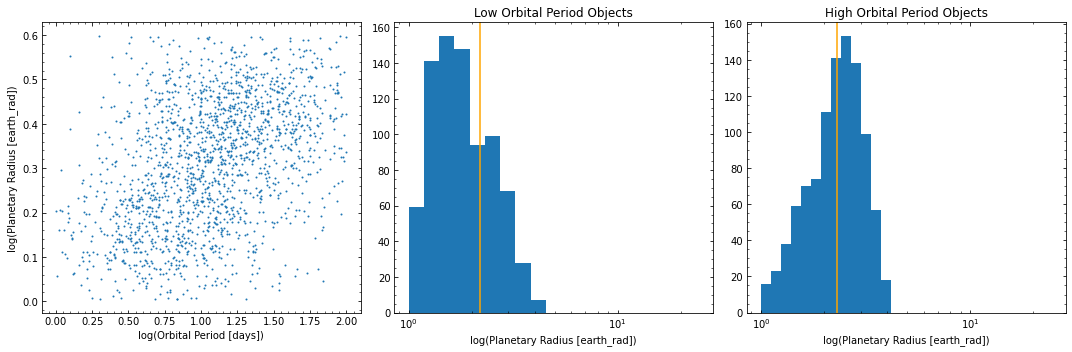

In [17]:
fig2, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize = (15,5))

bins_low = np.logspace(0, np.log(4), 20)
bins_high = np.logspace(0, np.log(4), 30)

ax1.scatter(np.log10(exo_data['koi_period'][valley]),np.log10(exo_data['koi_prad'][valley]), s = 1)
ax1.set_xlabel('log(Orbital Period [days])')
ax1.set_ylabel('log(Planetary Radius [earth_rad])')
# ax1.set_ylim(-1,1)   

ax2.hist(exo_data['koi_prad'][low], bins = bins_low)
ax2.set_xscale('log')
ax2.set_title('Low Orbital Period Objects')
ax2.set_xlabel('log(Planetary Radius [earth_rad])')
ax2.axvline(np.log(9), color = 'orange')

ax3.hist(exo_data['koi_prad'][high], bins = bins_high)
ax3.semilogx()
ax3.set_title('High Orbital Period Objects')
ax3.set_xlabel('log(Planetary Radius [earth_rad])');
ax3.axvline(np.log(10), color = 'orange')

fig2.tight_layout()